# Thesis Code Part 2: EDA

In [15]:
import re
import os
import pandas as pd
import numpy as np
import pydicom as dcm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read report data
data = pd.read_csv('data_processed.csv')
data.head()

,Organization,Point of Care,Source System,Accession Number,Modality,Exam Code,Exam Description,CPT Code,Report Text,Is Stat,Patient Status,Patient Sex,Patient Age,comm,Downloaded,Caption,DCM Path
0,M02,RAD X-RAY PARN,EPIC,10022729845,XR,DCHE2,XR CHEST 2 VIEWS PA AND LATERAL,71020,XR CHEST 2 VIEWS PA AND LATERAL 12/19/2022 1...,False,Inpatient,Female,64.0,0,True,Right chest wall port with catheter tip projec...,/mnt/sohn2022/UCSF_secure_cxr_data/raw/1002272...
1,MBXR1,RAD X-RAY MB,EPIC,10022781214,XR,DCHE2,XR CHEST 2 VIEWS PA AND LATERAL,71020,XR CHEST 2 VIEWS PA AND LATERAL 1/10/2023 8:...,False,Outpatient,Male,28.0,0,True,Clear lungs. No pleural effusion or pneumothor...,/mnt/sohn2022/UCSF_secure_cxr_data/raw/1002278...
2,PDR9,RAD X-RAY PARN,EPIC,10022677396,XR,DCHE1,XR CHEST 1 VIEW AP,71010,XR CHEST 1 VIEW AP 12/3/2022 10:00 PM\nHISTO...,False,Inpatient,Male,86.0,0,True,Interval placement of enteric tube with tip pa...,/mnt/sohn2022/UCSF_secure_cxr_data/raw/1002267...
3,PDR15,RAD X-RAY PARN,EPIC,10022412208,XR,DCHE1,XR CHEST 1 VIEW AP,71010,XR CHEST 1 VIEW AP 9/10/2022 1:32 PM\nHISTOR...,False,Inpatient,Male,21.0,0,True,Interval removal of a left-sided chest tube.\n...,/mnt/sohn2022/UCSF_secure_cxr_data/raw/1002241...
4,PDR16,RAD X-RAY PARN,EPIC,10022590217,XR,DCHE1,XR CHEST 1 VIEW AP,71010,XR CHEST 1 VIEW AP 11/4/2022 8:05 AM\nHISTOR...,False,Inpatient,Female,67.0,0,True,Increased size of now small to moderate right ...,/mnt/sohn2022/UCSF_secure_cxr_data/raw/1002259...


In [9]:
# example report text (no further communication)
sample = data[data['comm']==0].sample(1)
text = sample['Caption'].values[0]
text

'Stable medical support devices.\nIndistinctness of the pulmonary vasculature may represent mild to moderate pulmonary edema. No visible pleural effusions or pneumothorax. Stable cardiomediastinal silhouette.'

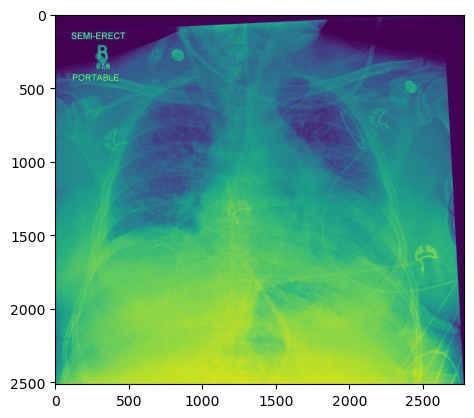

In [10]:
# example chest x-ray (no further communication)
image_path = sample['DCM Path'].values[0]
ds = dcm.dcmread(image_path)
plt.imshow(ds.pixel_array)

In [11]:
# example report text (with communication)
sample = data[data['comm']==1].sample(1)
text = sample['Caption'].values[0]
text

'Retrocardiac opacity in the left lower lobe, suggestive of pneumonia or atelectasis. Right lung clear. No pneumothorax.\nNormal cardiomediastinal silhouette size. Aortic calcifications.\n//'

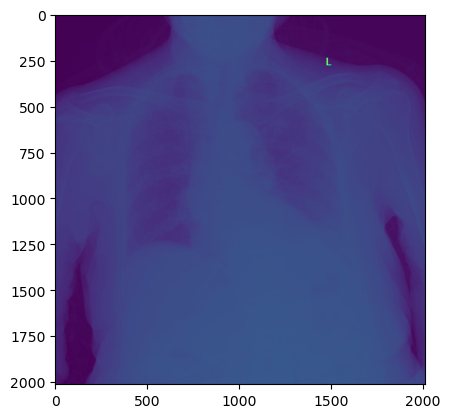

In [12]:
# example chest x-ray (with communication)
image_path = sample['DCM Path'].values[0]
ds = dcm.dcmread(image_path)
plt.imshow(ds.pixel_array)

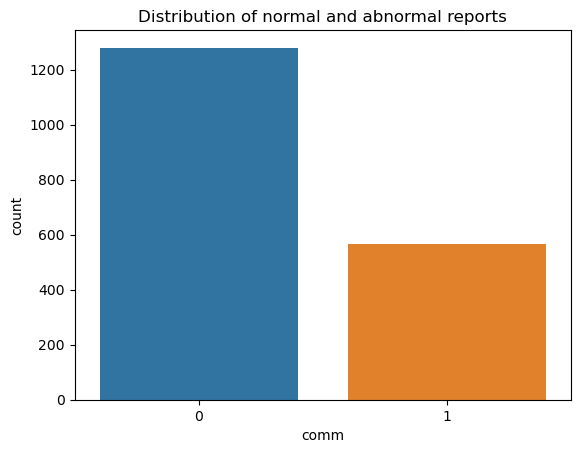

In [16]:
# Distribution of labels
ax = sns.countplot(x=data['comm'])
ax.set_title("Distribution of normal and abnormal reports");

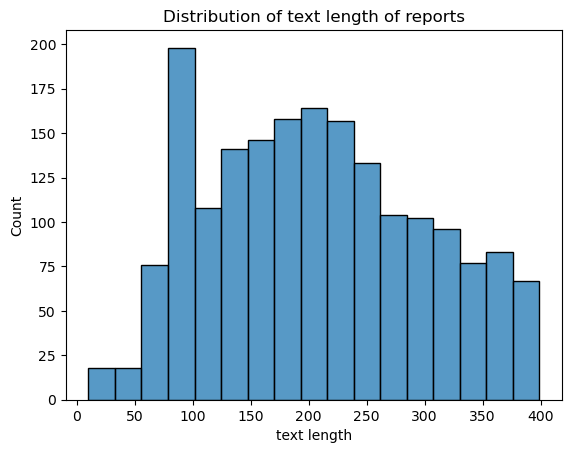

In [17]:
# Distribution of text length
data["text length"] = data["Caption"].str.len()
ax = sns.histplot(data=data,x='text length')
ax.set_title("Distribution of text length of reports");

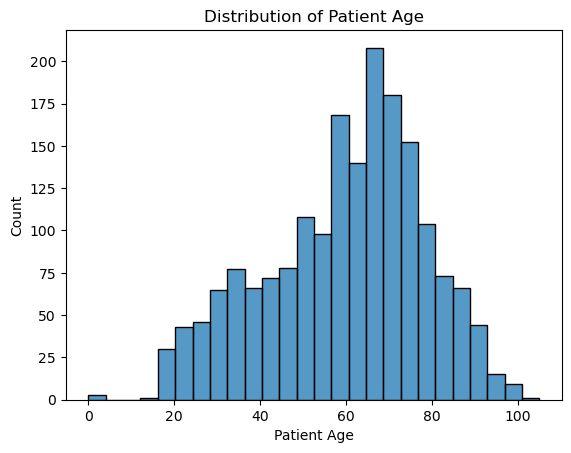

In [18]:
# Distribution of Age
ax = sns.histplot(data=data,x='Patient Age')
ax.set_title("Distribution of Patient Age");